In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score 
import pandas as pd
from itertools import combinations

In [2]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("dataset.csv",low_memory=False)

In [4]:
df

,e1,e2,e3,e4,m1,m2,m3,m4,m6,m7,emtion
0,0.349199,0.283633,0.332759,0.216879,0.428061,0.307376,0.464030,0.477004,0.379559,0.555433,0
1,0.311972,0.203816,0.327639,0.225092,0.308788,0.248257,0.379399,0.293015,0.404383,0.451443,0
2,0.310054,0.200216,0.328004,0.224183,0.309334,0.247905,0.377769,0.290631,0.401430,0.449153,0
3,0.311457,0.203679,0.328945,0.224877,0.311774,0.248453,0.380679,0.290603,0.402368,0.450308,0
4,0.310568,0.198933,0.320973,0.215203,0.308446,0.247227,0.377342,0.288206,0.401431,0.448102,0
...,...,...,...,...,...,...,...,...,...,...,...
190962,0.371969,0.273850,0.363048,0.259385,0.400054,0.357103,0.485807,0.449603,0.436512,0.544286,5
190963,0.370781,0.271194,0.359660,0.257587,0.398328,0.358318,0.484162,0.449081,0.433241,0.541959,5
190964,0.371106,0.275380,0.363035,0.261500,0.404077,0.360256,0.487446,0.449858,0.434916,0.542196,5
190965,0.368823,0.267257,0.360465,0.254971,0.400572,0.355059,0.482350,0.447075,0.432530,0.544820,5


In [5]:
target_dict=df.iloc[:,-1].value_counts()

Text(0.5, 1.0, 'Target variable distribution')

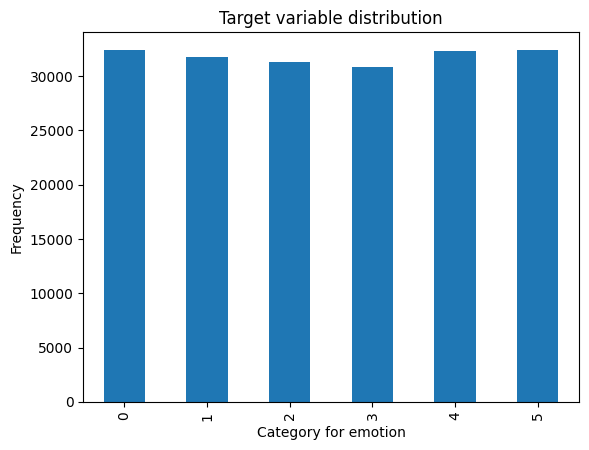

In [6]:
ax=target_dict.sort_index().plot(kind="bar")
ax.set_ylabel("Frequency")
ax.set_xlabel("Category for emotion")
ax.set_title("Target variable distribution")

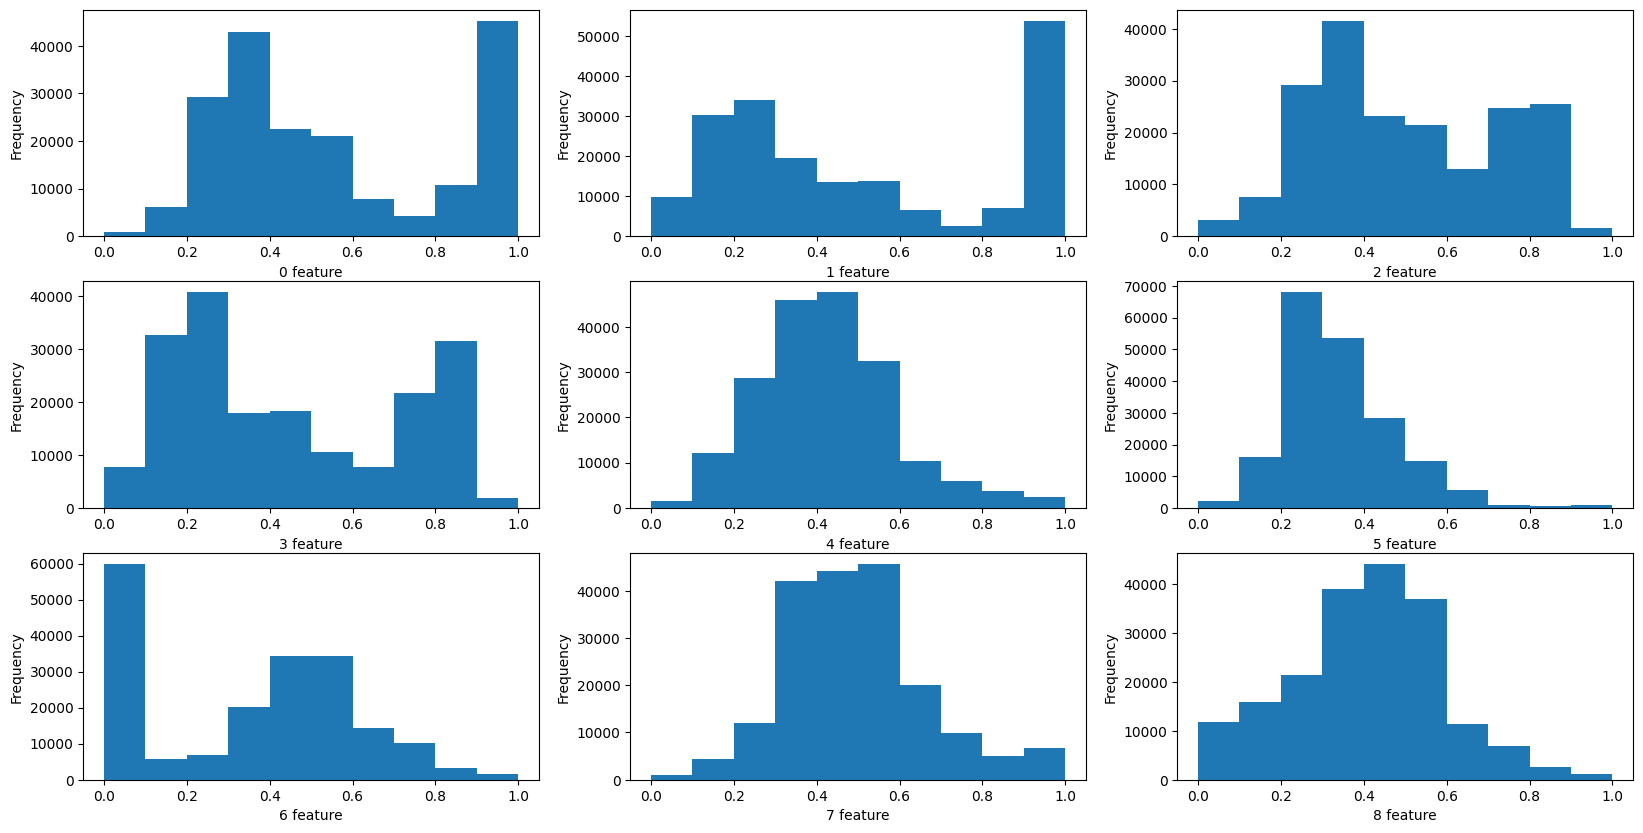

In [7]:
fig,ax=plt.subplots(3,3,figsize=(20,10))
for index in range(0,9):
    tmp=df.iloc[:,index].plot(ax=ax[index//3,index%3],kind="hist")
    tmp.set_xlabel(str(index)+" feature" )

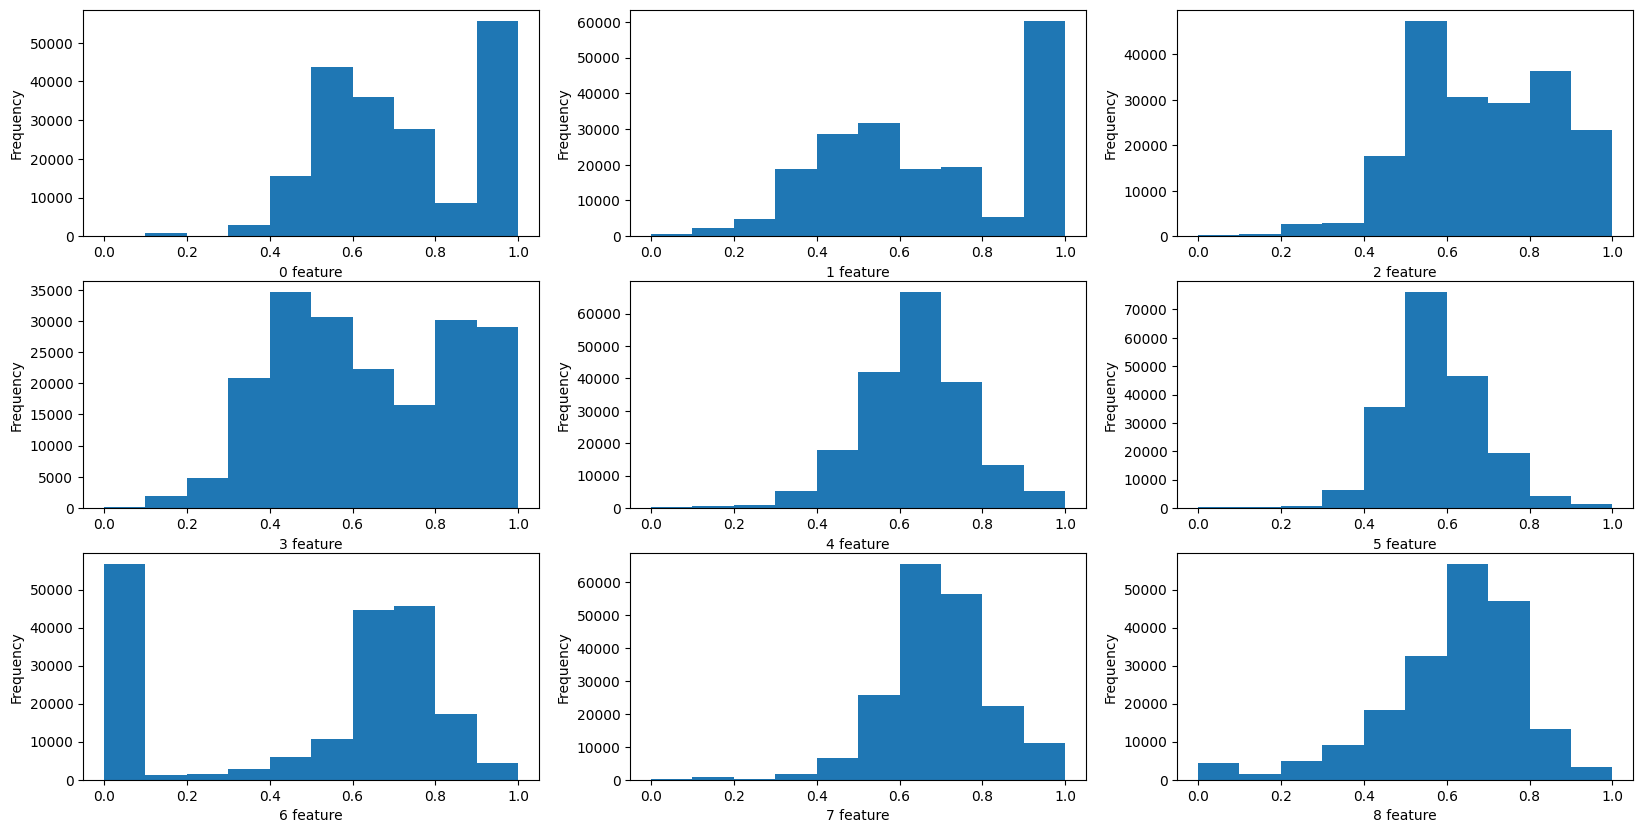

In [8]:
fig,ax=plt.subplots(3,3,figsize=(20,10))
for index in range(0,9):
    tmp=np.sqrt(df.iloc[:,index]).plot(ax=ax[index//3,index%3],kind="hist")
    tmp.set_xlabel(str(index)+" feature" )

In [9]:
new_X=df.iloc[:,:-1].copy()
arr=[i for i in range(len(df.columns)-1)]
for r in range(2,6):
    new_arr=list(combinations(arr,r))
    for lst in new_arr:
        curr=df[df.columns[lst[0]]].copy()
        for index in range(1,len(lst)) :
            curr*=df[df.columns[lst[index]]]
        new_X["*".join(str(lst))]=curr

for r in range(2,6):
    new_arr=list(combinations(arr,r))
    for lst in new_arr:
        divide=df[df.columns[lst[0]]].copy()
        for index in range(1,len(lst)):
            divide/=df[df.columns[lst[index]]]
        divide.replace(np.inf,1,inplace=True)
        divide.replace(np.nan,0,inplace=True)
        new_X["/".join(str(lst))]=divide
#new_X


In [10]:
new_X

,e1,e2,e3,e4,m1,m2,m3,m4,m6,m7,...,"(/3/,/ /5/,/ /6/,/ /7/,/ /9/)","(/3/,/ /5/,/ /6/,/ /8/,/ /9/)","(/3/,/ /5/,/ /7/,/ /8/,/ /9/)","(/3/,/ /6/,/ /7/,/ /8/,/ /9/)","(/4/,/ /5/,/ /6/,/ /7/,/ /8/)","(/4/,/ /5/,/ /6/,/ /7/,/ /9/)","(/4/,/ /5/,/ /6/,/ /8/,/ /9/)","(/4/,/ /5/,/ /7/,/ /8/,/ /9/)","(/4/,/ /6/,/ /7/,/ /8/,/ /9/)","(/5/,/ /6/,/ /7/,/ /8/,/ /9/)"
0,0.349199,0.283633,0.332759,0.216879,0.428061,0.307376,0.464030,0.477004,0.379559,0.555433,...,5.739137,7.212566,7.016389,4.647688,16.576330,11.327538,14.235696,13.848495,9.173307,6.587033
1,0.311972,0.203816,0.327639,0.225092,0.308788,0.248257,0.379399,0.293015,0.404383,0.451443,...,18.066274,13.090790,16.950090,11.091186,27.668189,24.783948,17.958404,23.252727,15.215278,12.232657
2,0.310054,0.200216,0.328004,0.224183,0.309334,0.247905,0.377769,0.290631,0.401430,0.449153,...,18.338162,13.276615,17.257243,11.324806,28.311610,25.303482,18.319426,23.812001,15.626268,12.523130
3,0.311457,0.203679,0.328945,0.224877,0.311774,0.248453,0.380679,0.290603,0.402368,0.450308,...,18.169098,13.122269,17.189718,11.218995,28.191190,25.189981,18.192962,23.832150,15.554228,12.395172
4,0.310568,0.198933,0.320973,0.215203,0.308446,0.247227,0.377342,0.288206,0.401431,0.448102,...,17.862346,12.824204,16.790466,11.000753,28.578170,25.601715,18.380655,24.065412,15.767142,12.637715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190962,0.371969,0.273850,0.363048,0.259385,0.400054,0.357103,0.485807,0.449603,0.436512,0.544286,...,6.109860,6.293103,6.799846,4.998376,11.749967,9.423343,9.705962,10.487521,7.709082,6.881406
190963,0.370781,0.271194,0.359660,0.257587,0.398328,0.358318,0.484162,0.449081,0.433241,0.541959,...,6.100605,6.323658,6.817633,5.045586,11.801231,9.433879,9.778804,10.542680,7.802415,7.018696
190964,0.371106,0.275380,0.363035,0.261500,0.404077,0.360256,0.487446,0.449858,0.434916,0.542196,...,6.105240,6.314982,6.842644,5.057177,11.761012,9.433961,9.758059,10.573415,7.814469,6.967019
190965,0.368823,0.267257,0.360465,0.254971,0.400572,0.355059,0.482350,0.447075,0.432530,0.544820,...,6.112165,6.317712,6.816183,5.017403,12.095426,9.602497,9.925421,10.708543,7.882574,6.986952


In [11]:
b=np.loadtxt("result_final.txt")
column_names=[]
for element in b:
    column_names.append(new_X.columns[element])
new_X.drop(columns=column_names,inplace=True)

In [12]:
#X=np.square(df.iloc[:,:-1])
#X=np.cbrt(df.iloc[:,:-1])
X=np.sqrt(new_X)
#X=new_X
y=df.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
190962    5
190963    5
190964    5
190965    5
190966    5
Name: emtion, Length: 190967, dtype: int64

In [13]:
scaler=preprocessing.StandardScaler()
#scaler=preprocessing.RobustScaler()
#scaler=preprocessing.MinMaxScaler()
X_scale=scaler.fit_transform(X)
#X_scale

In [14]:
#Split the data into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25,random_state=42)

In [15]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [20]:
C=[1000000,10000000,100000000]
for element in C:
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=5000,penalty="l2",C=element)
    model.fit(X_train,y_train)
    acc_model_train=model.score(X_train,y_train)
    train_score.append(acc_model_train)
    acc_model=model.score(X_test,y_test)
    test_score.append(acc_model)

In [21]:
train_score

[0.770033164601152,
 0.8068982370396229,
 0.8158910804677955,
 0.8190958282422761,
 0.8176296037702915,
 0.8191586664339326,
 0.8164915342991796,
 0.8176645138767673,
 0.8161424332344214]

In [1]:
test_score

NameError: name 'test_score' is not defined

In [106]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=5000,C=1000)

In [107]:
model.fit(X_train,y_train)
acc_model_train=model.score(X_train,y_train)
acc_model_train

0.8188165473904695

In [108]:
acc_model=model.score(X_test,y_test)
acc_model

0.8195718654434251

In [93]:
new_X       

,e1,e2,e3,e4,m1,m2,m3,m4,m6,m7,...,"(/3/,/ /5/,/ /6/,/ /7/,/ /9/)","(/3/,/ /5/,/ /6/,/ /8/,/ /9/)","(/3/,/ /5/,/ /7/,/ /8/,/ /9/)","(/3/,/ /6/,/ /7/,/ /8/,/ /9/)","(/4/,/ /5/,/ /6/,/ /7/,/ /8/)","(/4/,/ /5/,/ /6/,/ /7/,/ /9/)","(/4/,/ /5/,/ /6/,/ /8/,/ /9/)","(/4/,/ /5/,/ /7/,/ /8/,/ /9/)","(/4/,/ /6/,/ /7/,/ /8/,/ /9/)","(/5/,/ /6/,/ /7/,/ /8/,/ /9/)"
0,0.349199,0.283633,0.332759,0.216879,0.428061,0.307376,0.464030,0.477004,0.379559,0.555433,...,5.739137,7.212566,7.016389,4.647688,16.576330,11.327538,14.235696,13.848495,9.173307,6.587033
1,0.311972,0.203816,0.327639,0.225092,0.308788,0.248257,0.379399,0.293015,0.404383,0.451443,...,18.066274,13.090790,16.950090,11.091186,27.668189,24.783948,17.958404,23.252727,15.215278,12.232657
2,0.310054,0.200216,0.328004,0.224183,0.309334,0.247905,0.377769,0.290631,0.401430,0.449153,...,18.338162,13.276615,17.257243,11.324806,28.311610,25.303482,18.319426,23.812001,15.626268,12.523130
3,0.311457,0.203679,0.328945,0.224877,0.311774,0.248453,0.380679,0.290603,0.402368,0.450308,...,18.169098,13.122269,17.189718,11.218995,28.191190,25.189981,18.192962,23.832150,15.554228,12.395172
4,0.310568,0.198933,0.320973,0.215203,0.308446,0.247227,0.377342,0.288206,0.401431,0.448102,...,17.862346,12.824204,16.790466,11.000753,28.578170,25.601715,18.380655,24.065412,15.767142,12.637715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190962,0.371969,0.273850,0.363048,0.259385,0.400054,0.357103,0.485807,0.449603,0.436512,0.544286,...,6.109860,6.293103,6.799846,4.998376,11.749967,9.423343,9.705962,10.487521,7.709082,6.881406
190963,0.370781,0.271194,0.359660,0.257587,0.398328,0.358318,0.484162,0.449081,0.433241,0.541959,...,6.100605,6.323658,6.817633,5.045586,11.801231,9.433879,9.778804,10.542680,7.802415,7.018696
190964,0.371106,0.275380,0.363035,0.261500,0.404077,0.360256,0.487446,0.449858,0.434916,0.542196,...,6.105240,6.314982,6.842644,5.057177,11.761012,9.433961,9.758059,10.573415,7.814469,6.967019
190965,0.368823,0.267257,0.360465,0.254971,0.400572,0.355059,0.482350,0.447075,0.432530,0.544820,...,6.112165,6.317712,6.816183,5.017403,12.095426,9.602497,9.925421,10.708543,7.882574,6.986952


In [94]:
row,column=np.where(np.abs(model.coef_)<=2)

In [95]:
row.shape

(3675,)

In [96]:
column.shape

(3675,)

In [98]:
dict={}
result=[]
count=0
for index in range(len(row)):
    if column[index] not in dict:
        dict[column[index]]=[row[index]]
    else:
        dict[column[index]].append(row[index])
for key in dict:
    if(len(dict[key])>=3):
        count+=1
        print(key,dict[key])
        result.append(key)
print(count)
np.savetxt("result_final.txt", result);

10 [0, 1, 3, 5]
12 [0, 4, 5]
19 [0, 1, 2, 4, 5]
24 [0, 2, 3]
59 [0, 1, 3, 5]
60 [0, 1, 5]
61 [0, 1, 4]
63 [0, 3, 5]
65 [0, 2, 4]
70 [0, 3, 4, 5]
73 [0, 1, 3, 4, 5]
74 [0, 3, 5]
75 [0, 4, 5]
79 [0, 1, 3, 5]
87 [0, 3, 4]
92 [0, 1, 2, 3, 4, 5]
93 [0, 3, 4, 5]
95 [0, 1, 2, 3, 4]
96 [0, 2, 3, 4]
97 [0, 1, 2, 4]
106 [0, 1, 2, 3, 4]
107 [0, 1, 4]
110 [0, 1, 2, 3]
111 [0, 2, 3, 4, 5]
113 [0, 3, 4]
118 [0, 4, 5]
120 [0, 1, 2, 4, 5]
122 [0, 1, 2, 3, 4, 5]
126 [0, 1, 4]
127 [0, 3, 4, 5]
128 [0, 2, 3]
134 [0, 1, 4]
135 [0, 2, 4]
157 [0, 1, 3]
162 [0, 3, 4]
172 [0, 1, 5]
175 [0, 1, 2, 5]
176 [0, 4, 5]
178 [0, 3, 4]
183 [0, 1, 3, 4, 5]
185 [0, 3, 4, 5]
188 [0, 1, 4]
190 [0, 1, 2, 3]
197 [0, 3, 5]
203 [0, 2, 5]
204 [0, 4, 5]
210 [0, 2, 3, 5]
212 [0, 3, 4]
214 [0, 2, 5]
215 [0, 2, 4, 5]
217 [0, 2, 3, 5]
225 [0, 1, 4, 5]
226 [0, 1, 3, 4, 5]
227 [0, 3, 4, 5]
228 [0, 4, 5]
230 [0, 1, 2, 3, 5]
231 [0, 3, 4, 5]
232 [0, 3, 4, 5]
233 [0, 1, 4, 5]
235 [0, 1, 2, 3, 4, 5]
236 [0, 2, 4, 5]
239 [0, 2, 3]
241 [0, 

In [99]:
column_names=[]
for element in result:
    column_names.append(new_X.columns[element])
new_X.drop(columns=column_names,inplace=True)

In [100]:
new_X

,e1,e2,e3,e4,m1,m2,m3,m4,m6,m7,...,"(/2/,/ /3/,/ /4/,/ /6/,/ /9/)","(/2/,/ /3/,/ /4/,/ /8/,/ /9/)","(/2/,/ /3/,/ /5/,/ /8/,/ /9/)","(/2/,/ /3/,/ /6/,/ /7/,/ /8/)","(/2/,/ /3/,/ /6/,/ /8/,/ /9/)","(/2/,/ /4/,/ /6/,/ /8/,/ /9/)","(/3/,/ /4/,/ /7/,/ /8/,/ /9/)","(/3/,/ /5/,/ /6/,/ /8/,/ /9/)","(/4/,/ /5/,/ /6/,/ /8/,/ /9/)","(/4/,/ /5/,/ /7/,/ /8/,/ /9/)"
0,0.349199,0.283633,0.332759,0.216879,0.428061,0.307376,0.464030,0.477004,0.379559,0.555433,...,13.906884,17.001877,23.677341,18.262740,15.683979,7.946344,5.038225,7.212566,14.235696,13.848495
1,0.311972,0.203816,0.327639,0.225092,0.308788,0.248257,0.379399,0.293015,0.404383,0.451443,...,27.521786,25.821414,32.117307,32.378602,21.015760,15.319452,13.627398,13.090790,17.958404,23.252727
2,0.310054,0.200216,0.328004,0.224183,0.309334,0.247905,0.377769,0.290631,0.401430,0.449153,...,27.875873,26.232766,32.733048,33.196976,21.480571,15.567588,13.830219,13.276615,18.319426,23.812001
3,0.311457,0.203679,0.328945,0.224877,0.311774,0.248453,0.380679,0.290603,0.402368,0.450308,...,27.369596,25.894276,32.493738,32.862069,21.207276,15.296442,13.698495,13.122269,18.192962,23.832150
4,0.310568,0.198933,0.320973,0.215203,0.308446,0.247227,0.377342,0.288206,0.401431,0.448102,...,28.597444,26.881374,33.537901,34.164022,21.973314,15.330807,13.457932,12.824204,18.380655,24.065412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190962,0.371969,0.273850,0.363048,0.259385,0.400054,0.357103,0.485807,0.449603,0.436512,0.544286,...,13.231494,14.725727,16.496896,14.680137,12.126405,7.862457,6.069789,6.293103,9.705962,10.487521
190963,0.370781,0.271194,0.359660,0.257587,0.398328,0.358318,0.484162,0.449081,0.433241,0.541959,...,13.358879,14.929000,16.595996,14.822550,12.282347,7.942623,6.132831,6.323658,9.778804,10.542680
190964,0.371106,0.275380,0.363035,0.261500,0.404077,0.360256,0.487446,0.449858,0.434916,0.542196,...,12.999587,14.569705,16.341926,14.556893,12.077789,7.816208,6.100585,6.314982,9.758059,10.573415
190965,0.368823,0.267257,0.360465,0.254971,0.400572,0.355059,0.482350,0.447075,0.432530,0.544820,...,13.430001,14.976911,16.896727,15.156974,12.437705,7.916827,6.041725,6.317712,9.925421,10.708543
